In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('labour.csv')

 - Here I am aiming to save my dataset in mysql database and use it in my project. I will use the sqlalchemy library for this.
 - I will have to define an engine() for this process, but before that, two different situations arise as a connection string. This is because I will first connect to my database and create a database with a name I want. Then, in order to save my dataset to the database, I need to reconnect my engine() connection with the name of the database I created.
 - It looks like a code mess, but whatever method I tried, I couldn't succeed. For the reasons I explained in the previous article, I had to manage engine() with two different connection strings in this way.
 - Instead of using a local mysql solution, I created an azure mysql database, which is one of the free services specially defined for students, using the azure portal of the microsoft company and I will use it in my project.

In [4]:
from sqlalchemy import create_engine, text

user = 'ca2023'
password = 'CCT2023!'
host = 'cctmysql.mysql.database.azure.com'
port = 3306
database = 'cct_db'

engine_url = f'mysql+mysqlconnector://{user}:{password}@{host}:{port}'
db_url = f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}'

engine = create_engine(engine_url, echo=True)

with engine.connect() as conn:
    conn.execute(text(f"CREATE DATABASE IF NOT EXISTS {database};"))
    conn.close()

    

2023-05-25 17:25:25,897 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-05-25 17:25:25,898 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-05-25 17:25:26,476 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-05-25 17:25:26,476 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-05-25 17:25:26,761 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-05-25 17:25:26,764 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-05-25 17:25:27,147 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-05-25 17:25:27,149 INFO sqlalchemy.engine.Engine CREATE DATABASE IF NOT EXISTS cct_db;
2023-05-25 17:25:27,150 INFO sqlalchemy.engine.Engine [generated in 0.19473s] {}
2023-05-25 17:25:27,261 INFO sqlalchemy.engine.Engine ROLLBACK


 - Now that I have created my database, I will send the dataframe to my database using my connection string containing the database for engine().
 - I carry out my process by checking for errors due to the possibility of the current table name being in the database.
 - I am performing my operation using the **to_sql()** function of the pandas library.

In [5]:
engine = create_engine(db_url, echo=True)
try:
    df.to_sql('labour', con=engine, if_exists='fail', index=False)
except Exception as ex:
    print(ex)
else:
    print("Table created")

2023-05-25 17:25:28,347 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-05-25 17:25:28,348 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-05-25 17:25:28,915 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-05-25 17:25:28,921 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-05-25 17:25:29,207 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-05-25 17:25:29,209 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-05-25 17:25:29,680 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-05-25 17:25:29,682 INFO sqlalchemy.engine.Engine DESCRIBE `cct_db`.`labour`
2023-05-25 17:25:29,683 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-05-25 17:25:29,807 INFO sqlalchemy.engine.Engine ROLLBACK
Table 'labour' already exists.


In [6]:
conn = engine.connect()
sqldf = pd.read_sql_table('labour', conn)

2023-05-25 17:25:30,133 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-05-25 17:25:30,134 INFO sqlalchemy.engine.Engine DESCRIBE `cct_db`.`labour`
2023-05-25 17:25:30,135 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-05-25 17:25:30,433 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `labour`
2023-05-25 17:25:30,437 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-05-25 17:25:30,739 INFO sqlalchemy.engine.Engine SELECT labour.`STRUCTURE`, labour.`STRUCTURE_ID`, labour.freq, labour.indic_bt, labour.nace_r2, labour.s_adj, labour.unit, labour.geo, labour.`TIME_PERIOD`, labour.`OBS_VALUE`, labour.`OBS_FLAG` 
FROM labour
2023-05-25 17:25:30,741 INFO sqlalchemy.engine.Engine [generated in 0.19362s] {}


In [7]:
sqldf.head()

,STRUCTURE,STRUCTURE_ID,freq,indic_bt,nace_r2,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,I10,AL,2005,76.9,None
1,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,I10,AL,2006,76.7,None
2,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,I10,AL,2007,74.1,None
3,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,I10,AL,2008,97.3,None
4,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,I10,AL,2009,103.7,None


In [8]:
sqldf.shape

(9314, 11)

In [9]:
sqldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9314 entries, 0 to 9313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STRUCTURE     9314 non-null   object 
 1   STRUCTURE_ID  9314 non-null   object 
 2   freq          9314 non-null   object 
 3   indic_bt      9314 non-null   object 
 4   nace_r2       9314 non-null   object 
 5   s_adj         9314 non-null   object 
 6   unit          9314 non-null   object 
 7   geo           9314 non-null   object 
 8   TIME_PERIOD   9314 non-null   int64  
 9   OBS_VALUE     9108 non-null   float64
 10  OBS_FLAG      1717 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 800.6+ KB


<table border="1" cellspacing="0" cellpadding="0">
    <tbody>
        <tr>
            <td width="301" valign="top">
                <p>
                    Column Name
                </p>
            </td>
            <td width="301" valign="top">
                <p>
                    Description
                </p>
            </td>
        </tr>
        <tr>
            <td width="301" valign="top">
                <p>
                    freq
                </p>
            </td>
            <td width="301" valign="top">
                <p>
                    Frequency of publication of data
                </p>
            </td>
        </tr>
        <tr>
            <td width="301" valign="top">
                <p>
                    Indic_bt
                </p>
            </td>
            <td width="301" valign="top">
                <p>
                    The type of statistic (employment, production, sales, etc.)
                </p>
            </td>
        </tr>
        <tr>
            <td width="301" valign="top">
                <p>
                    nace_r2
                </p>
            </td>
            <td width="301" valign="top">
                <p>
                    Code showing which industry classification the data relates
                    to
                </p>
            </td>
        </tr>
        <tr>
            <td width="301" valign="top">
                <p>
                    s_adj
                </p>
            </td>
            <td width="301" valign="top">
                <p>
                    Code indicating whether it is seasonally adjusted or
                    unadjusted
                </p>
            </td>
        </tr>
        <tr>
            <td width="301" valign="top">
                <p>
                    unit
                </p>
            </td>
            <td width="301" valign="top">
                <p>
                    unit of measurement
                </p>
            </td>
        </tr>
        <tr>
            <td width="301" valign="top">
                <p>
                    geo
                </p>
            </td>
            <td width="301" valign="top">
                <p>
                    Country
                </p>
            </td>
        </tr>
        <tr>
            <td width="301" valign="top">
                <p>
                    TIME_PERIOD
                </p>
            </td>
            <td width="301" valign="top">
                <p>
                    Year
                </p>
            </td>
        </tr>
        <tr>
            <td width="301" valign="top">
                <p>
                    OBS_VALUE
                </p>
            </td>
            <td width="301" valign="top">
                <p>
                    Value of data <br/>
                    <br/>
                </p>
            </td>
        </tr>
        <tr>
            <td width="301" valign="top">
                <p>
                    OBS_FLAG
                </p>
            </td>
            <td width="301" valign="top">
                <p>
                    A code that provides additional information about the
                    accuracy or reliability of the data
                </p>
            </td>
        </tr>
    </tbody>
</table>

In [10]:
sqldf.describe()

,TIME_PERIOD,OBS_VALUE
count,9314.000000,9108.000000
mean,2010.120893,72.166359
std,6.580738,54.231636
min,1990.000000,-67.400000
25%,2005.000000,8.100000
50%,2010.000000,91.200000
75%,2015.000000,106.000000
max,2022.000000,406.500000


In [11]:
sqldf.describe(include="object")

,STRUCTURE,STRUCTURE_ID,freq,indic_bt,nace_r2,s_adj,unit,geo,OBS_FLAG
count,9314,9314,9314,9314,9314,9314,9314,9314,1717
unique,1,1,1,3,1,2,3,36,5
top,dataflow,ESTAT:STS_COLB_A(1.0),A,WAGE,F,NSA,I15,NL,p
freq,9314,9314,9314,3546,9314,5728,3931,338,866


- I will use the uniqe() function to display what are the unique values ​​in my categorical columns. 
- I will also use tabulate, a simple library of tables, to display values ​​neatly

In [12]:
from tabulate import tabulate

table_data = {
    "indic_bt": sqldf.indic_bt.unique(),
    "s_adj": sqldf.s_adj.unique(),
    "unit": sqldf.unit.unique()
}

table = tabulate(table_data, headers="keys", tablefmt="psql")

print(table)

+------------+---------+--------+
| indic_bt   | s_adj   | unit   |
|------------+---------+--------|
| EMPL       | NSA     | I10    |
| HOWK       | CA      | I15    |
| WAGE       |         | PCH_SM |
+------------+---------+--------+


### I've added a small table explanation to explain what the values ​​for my categorical columns mean, the abbreviation values ​​on the eurostat website
<table border="1" cellspacing="0" cellpadding="0">
    <tbody>
        <tr>
            <td width="204" colspan="2" valign="top">
                <p align="center">
                    Indic_bt
                </p>
            </td>
            <td width="198" colspan="2" valign="top">
                <p align="center">
                    S_adj
                </p>
            </td>
            <td width="199" colspan="2" valign="top">
                <p align="center">
                    unit
                </p>
            </td>
        </tr>
        <tr>
            <td width="58" valign="top">
                <p>
                    EMPL
                </p>
            </td>
            <td width="146" valign="top">
                <p>
                    Employment (number of persons employed)
                </p>
            </td>
            <td width="42" valign="top">
                <p>
                    NSA
                </p>
            </td>
            <td width="156" valign="top">
                <p>
                    Unadjusted data (i.e. neither seasonally adjusted nor
                    calendar adjusted data)
                </p>
            </td>
            <td width="70" valign="top">
                <p>
                    I10
                </p>
            </td>
            <td width="129" valign="top">
                <p>
                    Index, 2010=100
                </p>
            </td>
        </tr>
        <tr>
            <td width="58" valign="top">
                <p>
                    HOWK
                </p>
            </td>
            <td width="146" valign="top">
                <p>
                    Volume of work done (hours worked)
                </p>
            </td>
            <td width="42" valign="top">
                <p>
                    CA
                </p>
            </td>
            <td width="156" valign="top">
                <p>
                    Calencar adjusted data, not seasonally adjusted data
                </p>
            </td>
            <td width="70" valign="top">
                <p>
                    I15
                </p>
            </td>
            <td width="129" valign="top">
                <p>
                    Index, 2015=100
                </p>
            </td>
        </tr>
        <tr>
            <td width="58" valign="top">
                <p>
                    WAGE
                </p>
            </td>
            <td width="146" valign="top">
                <p>
                    Gross wages and salaries
                </p>
            </td>
            <td width="42" valign="top">
            </td>
            <td width="156" valign="top">
            </td>
            <td width="70" valign="top">
                <p>
                    PCH_SM
                </p>
            </td>
            <td width="129" valign="top">
                <p>
                    Percentage change compared to same period in previous year
                </p>
            </td>
        </tr>
    </tbody>
</table>

- Since I will be using the employment data, which is the main subject of my project, I will take the EMPL values in the indic_bt column. 
- Preferably by using the PCH_SM values from the unit column

In [13]:
filtered_df = sqldf.loc[(df['indic_bt'] == 'EMPL') & (df['unit'] == 'PCH_SM')]

In [14]:
filtered_df.head()

,STRUCTURE,STRUCTURE_ID,freq,indic_bt,nace_r2,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
1494,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2006,-0.3,None
1495,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2007,-3.3,None
1496,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2008,31.4,None
1497,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2009,6.5,None
1498,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2010,-3.6,None


In [15]:
filtered_df.shape

(803, 11)

In [16]:
filtered_df.describe(include="object")

,STRUCTURE,STRUCTURE_ID,freq,indic_bt,nace_r2,s_adj,unit,geo,OBS_FLAG
count,803,803,803,803,803,803,803,803,70
unique,1,1,1,1,1,1,1,36,4
top,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,FR,e
freq,803,803,803,803,803,803,803,32,34


When I look at the records in the first 5 rows of my filtered dataset, I notice that my index values are not normal. Since I have created a new dataframe by filtering from my existing dataset according to certain criteria, the index values appear as row numbers in my current dataset. I will use the reset_index() function to fix this and apply sequential index values to the dataframe.

In [17]:
filtered_df.reset_index(drop=True, inplace=True)

In [18]:
filtered_df.head()

,STRUCTURE,STRUCTURE_ID,freq,indic_bt,nace_r2,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2006,-0.3,None
1,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2007,-3.3,None
2,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2008,31.4,None
3,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2009,6.5,None
4,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2010,-3.6,None


Now that I have done the necessary filtering according to the categorical columns of my dataset, I can now start my operations with numeric columns. For this, first of all, I want to check if there are any empty or missing values in my rows.

In [19]:
# Check for missing values
filtered_df.isnull().sum()

STRUCTURE         0
STRUCTURE_ID      0
freq              0
indic_bt          0
nace_r2           0
s_adj             0
unit              0
geo               0
TIME_PERIOD       0
OBS_VALUE        15
OBS_FLAG        733
dtype: int64

I want to select the years in which the obs_value column of all countries is not null in all years

In [20]:
non_null_counts = filtered_df.groupby('geo')['OBS_VALUE'].count()
non_null_counts

geo
AL    17
AT    26
BE    21
BG    22
CH    24
CY    22
CZ    22
DE    22
DK    14
EE    24
EL    22
ES    22
FI    22
FR    32
HR    22
HU    22
IE    22
IS    14
IT    22
LT    24
LU    22
LV    22
ME    22
MK    15
MT    22
NL    26
NO    22
PL    22
PT    22
RO    22
RS    22
SE    22
SI    22
SK    27
TR    17
UK    23
Name: OBS_VALUE, dtype: int64

In [21]:
# Finding the number of filled values ​​for each year
non_null_years = filtered_df.groupby('TIME_PERIOD')['OBS_VALUE'].count()

# Select only full years
non_null_years = non_null_years[non_null_years == len(filtered_df['geo'].unique())]


In [22]:
# Filtering dataset by full years
filtered_df = filtered_df[filtered_df['TIME_PERIOD'].isin(non_null_years.index)]


In [23]:
# Calculating the number of full years for each country
non_null_counts = filtered_df.groupby('geo')['OBS_VALUE'].count()
non_null_counts

geo
AL    11
AT    11
BE    11
BG    11
CH    11
CY    11
CZ    11
DE    11
DK    11
EE    11
EL    11
ES    11
FI    11
FR    11
HR    11
HU    11
IE    11
IS    11
IT    11
LT    11
LU    11
LV    11
ME    11
MK    11
MT    11
NL    11
NO    11
PL    11
PT    11
RO    11
RS    11
SE    11
SI    11
SK    11
TR    11
UK    11
Name: OBS_VALUE, dtype: int64

In [24]:
print(filtered_df["TIME_PERIOD"].unique())

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [25]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 3 to 802
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STRUCTURE     396 non-null    object 
 1   STRUCTURE_ID  396 non-null    object 
 2   freq          396 non-null    object 
 3   indic_bt      396 non-null    object 
 4   nace_r2       396 non-null    object 
 5   s_adj         396 non-null    object 
 6   unit          396 non-null    object 
 7   geo           396 non-null    object 
 8   TIME_PERIOD   396 non-null    int64  
 9   OBS_VALUE     396 non-null    float64
 10  OBS_FLAG      15 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 37.1+ KB


In [26]:
filtered_df.isnull().sum()

STRUCTURE         0
STRUCTURE_ID      0
freq              0
indic_bt          0
nace_r2           0
s_adj             0
unit              0
geo               0
TIME_PERIOD       0
OBS_VALUE         0
OBS_FLAG        381
dtype: int64

In my dataset, you can see that the geo column, that is, the column representing the countries, consists of only a 2-digit country code. Now I want to add a new column named country to my dataset and I want to add the names of the countries according to the country codes in the geo column to this country column.

In [27]:
import pycountry

def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return None

In [28]:
filtered_df['country'] = filtered_df['geo'].apply(get_country_name)

In the method, I specify that my country codes are 2 digits with alpha2. If it had 3 digits I would use alpha3. If it can't find any country code in the method, I wanted it to add the value None as a check. Now according to this situation, do I have a value of None or I want to see if I have successfully converted all country codes?

In [29]:
filtered_df.sample(5)

,STRUCTURE,STRUCTURE_ID,freq,indic_bt,nace_r2,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,country
575,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,NL,2016,-0.3,None,Netherlands
486,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,LV,2013,10.3,None,Latvia
659,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,RO,2012,7.6,None,Romania
591,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,NO,2010,-1.5,None,Norway
103,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,CH,2015,0.3,e,Switzerland


Yes, exactly as I thought. When I list the example 5 rows in my dataset, I observe that the value of the country with the EL code is None. Now, for this, it is necessary to filter the None values ​​of the country names in the country column and produce a solution for this.

In [30]:
missing_countries = filtered_df[filtered_df['country'].isnull()]['geo'].unique()
missing_countries

array(['EL', 'UK'], dtype=object)

I can see now that I couldn't find the names of the countries with EL and UK codes in my library. When I search these country codes on the internet, I can see that the EL code corresponds to Greece and the UK code to United Kingdom.
Now I will look at the corresponding country codes in my library according to the names of these countries and replace the EL and UK values in the geo column in my own dataset.


In [31]:
print(pycountry.countries.get(name='Greece').alpha_2)

GR


In [32]:
print(pycountry.countries.get(name='United Kingdom').alpha_2)

GB


In [33]:
filtered_df['geo'] = filtered_df['geo'].replace({'EL': 'GR', 'UK': 'GB'})

In [34]:
filtered_df['country'] = filtered_df['geo'].apply(get_country_name)

In [35]:
filtered_df.sample(5)

,STRUCTURE,STRUCTURE_ID,freq,indic_bt,nace_r2,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,country
366,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,HU,2019,18.9,None,Hungary
442,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,LT,2013,1.2,None,Lithuania
398,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,IS,2015,9.8,None,Iceland
468,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,LU,2017,3.1,None,Luxembourg
542,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,MT,2010,-7.5,None,Malta


- Now all of my country codes have been completed according to the ISO3166 standard. Also, None values are left in my country names column. let's check it again.
- Yes now I can tell from an empty string result that I don't have a line with the value None in the country names column.

In [36]:
missing_countries = filtered_df[filtered_df['country'].isnull()]['geo'].unique()
missing_countries

array([], dtype=object)

In [37]:
filtered_df.describe()

,TIME_PERIOD,OBS_VALUE
count,396.000000,396.000000
mean,2014.000000,-0.490657
std,3.166278,8.890347
min,2009.000000,-67.400000
25%,2011.000000,-3.400000
50%,2014.000000,0.600000
75%,2017.000000,3.800000
max,2019.000000,27.900000


In [38]:
filtered_df.describe(include="object")

,STRUCTURE,STRUCTURE_ID,freq,indic_bt,nace_r2,s_adj,unit,geo,OBS_FLAG,country
count,396,396,396,396,396,396,396,396,15,396
unique,1,1,1,1,1,1,1,36,2,36
top,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,e,Albania
freq,396,396,396,396,396,396,396,11,13,11


In [39]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 3 to 802
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STRUCTURE     396 non-null    object 
 1   STRUCTURE_ID  396 non-null    object 
 2   freq          396 non-null    object 
 3   indic_bt      396 non-null    object 
 4   nace_r2       396 non-null    object 
 5   s_adj         396 non-null    object 
 6   unit          396 non-null    object 
 7   geo           396 non-null    object 
 8   TIME_PERIOD   396 non-null    int64  
 9   OBS_VALUE     396 non-null    float64
 10  OBS_FLAG      15 non-null     object 
 11  country       396 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 40.2+ KB


In [40]:
filtered_df.head()

,STRUCTURE,STRUCTURE_ID,freq,indic_bt,nace_r2,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,country
3,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2009,6.5,None,Albania
4,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2010,-3.6,None,Albania
5,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2011,-8.8,None,Albania
6,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2012,3.2,None,Albania
7,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2013,-5.8,None,Albania


In [41]:
filtered_df.tail()

,STRUCTURE,STRUCTURE_ID,freq,indic_bt,nace_r2,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,country
798,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,GB,2015,3.7,None,United Kingdom
799,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,GB,2016,2.7,None,United Kingdom
800,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,GB,2017,5.6,None,United Kingdom
801,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,GB,2018,0.3,None,United Kingdom
802,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,GB,2019,2.9,None,United Kingdom


I had reset my indexes before, but after that process, I applied to filter operations again, so I see that my indexes are not in order. So I need to reset my indexes again

In [42]:
# reset index
filtered_df.reset_index(drop=True, inplace=True)

In [43]:
filtered_df.head()

,STRUCTURE,STRUCTURE_ID,freq,indic_bt,nace_r2,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,country
0,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2009,6.5,None,Albania
1,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2010,-3.6,None,Albania
2,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2011,-8.8,None,Albania
3,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2012,3.2,None,Albania
4,dataflow,ESTAT:STS_COLB_A(1.0),A,EMPL,F,NSA,PCH_SM,AL,2013,-5.8,None,Albania


In [44]:
import plotly.express as px

fig = px.choropleth(filtered_df, 
                    locations="country",
                    locationmode="country names",
                    color="OBS_VALUE", 
                    hover_name="country", 
                    # column to add to hover information
                    animation_frame="TIME_PERIOD", 
                    # column on which to animate
                    color_continuous_scale=px.colors.sequential.Plasma)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Labour in Europe',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)
fig.show()

In [45]:
# line chart
fig = px.line(
    filtered_df,
    x="TIME_PERIOD",
    y="OBS_VALUE",
    color='country',
    labels={'TIME_PERIOD': 'Year', 'OBS_VALUE': 'Value', 'country': 'Country'}, # set the labels for the chart
    title='Labour in Europe',
    hover_name='country',
    
)
fig.show()

- I have performed the necessary visualization processes of my existing data set and now I want to start comparing Ireland with different countries.
- I will use Ireland and the United Kingdom in my research.


In [46]:
df_ire_uk = filtered_df[filtered_df['country'].isin(['Ireland', 'United Kingdom'])]


In [47]:
fig = px.bar(df_ire_uk, x='TIME_PERIOD', y='OBS_VALUE', color='country', barmode='group')
fig.show()

In [48]:
df_ire = filtered_df[filtered_df['country'] == 'Ireland']
df_uk = filtered_df[filtered_df['country'] == 'United Kingdom']

In [49]:
ir_mean = df_ire['OBS_VALUE'].mean()
uk_mean = df_uk['OBS_VALUE'].mean()

print(f"Mean of Ireland: {ir_mean}")
print(f"Mean of United Kingdom: {uk_mean}")

Mean of Ireland: -0.5636363636363642
Mean of United Kingdom: 0.20909090909090924


In [50]:
from scipy.stats import ttest_ind

ireland_emp = df_ire['OBS_VALUE']
uk_emp = df_uk['OBS_VALUE']

# Perform the t-test
t_stat, p_value = ttest_ind(ireland_emp, uk_emp, equal_var=True)

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: -0.14795036151807678
P-Value: 0.8838633923723441


In [51]:
import numpy as np
from scipy.stats import sem

n_ire = len(ireland_emp) # number of observations
n_uk = len(uk_emp) # number of observations

se_ire = sem(ireland_emp) # standard error
se_uk = sem(uk_emp) # standard error

mean_diff = ir_mean - uk_mean # mean difference

margin_of_error = 1.96 * np.sqrt(se_ire**2 + se_uk**2) # margin of error
confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error) # confidence interval

print(f"Confidence interval: {confidence_interval}") # print the confidence interval

Confidence interval: (-11.009575895502733, 9.464121350048186)


In [52]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(ireland_emp, uk_emp)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

F-Statistic: 0.021889309473329593
P-Value: 0.8838633923723427


In [53]:
from scipy.stats import wilcoxon

w_stat, p_value = wilcoxon(ireland_emp, uk_emp)

print("W-Statistic:", w_stat)
print("P-Value:", p_value)

W-Statistic: 30.0
P-Value: 0.8310546875


In [54]:
from scipy.stats import pearsonr, spearmanr

corr, p_value = pearsonr(ireland_emp, uk_emp)
print("Pearson's Correlation Coefficient:", corr)
print("P-Value:", p_value)

corr, p_value = spearmanr(ireland_emp, uk_emp)
print("Spearman's Rank Correlation Coefficient:", corr)
print("P-Value:", p_value)

Pearson's Correlation Coefficient: 0.8539069173768631
P-Value: 0.0008219378026424924
Spearman's Rank Correlation Coefficient: 0.7972685832618591
P-Value: 0.0032922642485823405


In [55]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(
    df_ire_uk['country'],
    df_ire_uk['TIME_PERIOD'],
)

contingency_table

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi2 Statistic:", chi2)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi2 Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 10
Expected Frequencies:
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


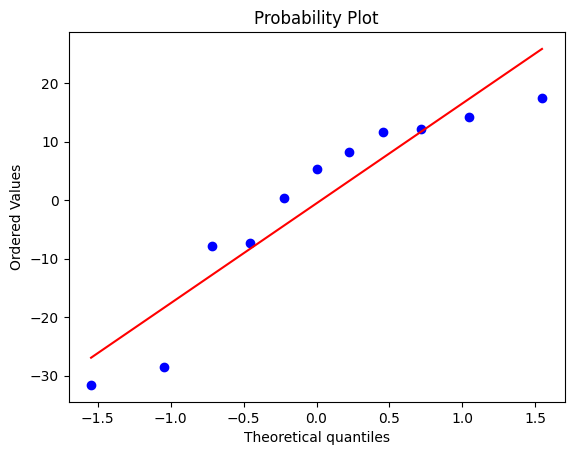

In [56]:
from scipy.stats import probplot
import matplotlib.pyplot as plt


probplot(ireland_emp, plot=plt)
plt.show()

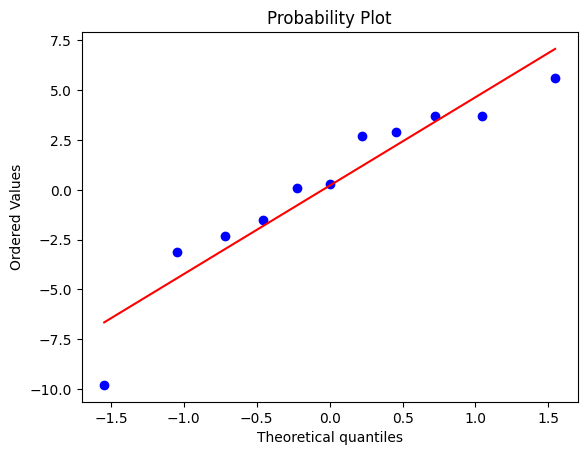

In [57]:
from scipy.stats import probplot
import matplotlib.pyplot as plt


probplot(uk_emp, plot=plt)
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder

# convert the categorical variable into numeric
le = LabelEncoder()
filtered_df['country'] = le.fit_transform(filtered_df['country'])

In [59]:
from sklearn.model_selection import train_test_split

X = filtered_df[['TIME_PERIOD', 'country']]
y = filtered_df['OBS_VALUE']

X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Lineer Regregrission mode
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Decision Tree Regressor prediction
dt_predictions = dt_model.predict(X_test)

# Lineer Regregrission prediction
linear_predictions = linear_model.predict(X_test)

# Random Forest Regressor prediction
rf_predictions = rf_model.predict(X_test)


I have created a method here and instead of calculating the values ​​of different models one by one, I will reach the solution in a short way as I want thanks to my method.

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(predictions):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

table_data = {
    "Decision Tree": evaluate_model(dt_predictions),
    "Linear Regression": evaluate_model(linear_predictions),
    "Random Forest": evaluate_model(rf_predictions),
}

table = tabulate(table_data, headers="keys", tablefmt="psql")

print(table)


+-----------------+---------------------+-----------------+
|   Decision Tree |   Linear Regression |   Random Forest |
|-----------------+---------------------+-----------------|
|       96.6561   |          52.3633    |       47.5844   |
|       -0.821759 |           0.0130656 |        0.103137 |
+-----------------+---------------------+-----------------+


Here again, I will pull the values ​​from my method to get the values ​​I need while graphing. To do this, since my method outputs 2 different values, mse and r2, I used the use of tuple variables to get these two values ​​at the same time.

In [88]:
# create bar chart for the model perform with px.bar MSE and R2 score
dt_mse, dt_r2 = evaluate_model(dt_predictions)
linear_mse, linear_r2 = evaluate_model(linear_predictions)
rf_mse, rf_r2 = evaluate_model(rf_predictions)

mse_scores = [dt_mse, linear_mse, rf_mse]
r2_scores = [dt_r2, linear_r2, rf_r2]

models = ['Decision Tree', 'Linear Regression', 'Random Forest']

data = {'Models': models,
        'mse_scores': mse_scores,
        'r2_scores': r2_scores}

mse_fig = px.bar(data, x='Models', y='mse_scores', color='Models', title='MSE Scores', width=800, height=400)
r2_fig = px.bar(data, x='Models', y='r2_scores', color='Models', title='R2 Scores', width=800, height=400)

mse_fig.show()
r2_fig.show()

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# GridSearchCV find the best parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a base model
model = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#  Print the best parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best score: -67.69297334344671


In [64]:
from sklearn.ensemble import RandomForestRegressor

# Create a model with the best parameters
best_params = {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
model = RandomForestRegressor(**best_params)

# Fit the model
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the MSE and R2 score
print("MSE:", mse)
print("R2:", r2)

MSE: 41.983890242518
R2: 0.2086945956070081


I need to find the codes corresponding to ireland and uk from my categorical country column that I have made numeric. Because I will make my predictions according to these codes.

In [89]:
# get the ireland and uk data
ireland_encoded = le.transform(['Ireland'])[0]
uk_encoded = le.transform(['United Kingdom'])[0]

year = 2020
ireland_pred = pd.DataFrame({'TIME_PERIOD': [year], 'country': [ireland_encoded]})
uk_pred = pd.DataFrame({'TIME_PERIOD': [year], 'country': [uk_encoded]})

# predict the ireland and uk data
ireland_pred = model.predict(ireland_pred)
uk_pred = model.predict(uk_pred)

# print the ireland and uk data
print("Ireland Predict:", ireland_pred)
print("UK Predict:", uk_pred)

Ireland Predict: [7.70357451]
UK Predict: [-2.97186141]


- I will pull data with the api using the reddit API service. For this process, I created my application on the reddit site and described its information below.

In [103]:
APP_NAME = 'pda-2023-feb-ft-emre'
APP_ID = 'SLFV399Ti1EXwyWr3OEtNg'
APP_SECRET = 'ZG6KpHTkADd7E3ngEZ1w-Xq-1DMjMw'
REDDIT_USERNAME = 'cctemre'
PASSWORD = 'RfN=$Njvqt-i^57'

- I will use the praw library to be able to use the reddit api service
- I will use the random library to reach a certain number of random topics
- I will use the re.search() function using the re library. This function searches for a specific regular expression within a text and returns True if there is a match.
- The purpose of using the re library is because I do not want to receive texts that are empty in the text part of the data received from the API or that contain links.
- I will calculate sentimental score for the texts I find by searching reddit titled ireland construction labor

In [138]:
import praw
from textblob import TextBlob
import random
import re

# PRAW istemcisini oluşturun
reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=APP_SECRET,
    username=REDDIT_USERNAME,
    password=PASSWORD,
    user_agent=APP_NAME
)

# Arama yapın
search_query = "ireland construction labour"
search_results = reddit.subreddit("all").search(search_query, limit=None)  # Tüm sonuçları almak için

# Rastgele 10 sonucu seçin
random_results = random.sample(list(search_results), 50)

# Sonuçları bir değişkene atayın
results_text = ""
for submission in random_results:
    if submission.selftext.strip() == "" or re.search(r'(http|https)://', submission.selftext):
        continue  # Selftext boş veya içinde link varsa atlayın

    results_text += submission.title + "\n"
    results_text += submission.selftext + "\n"
    results_text += "--------------------\n"

# Sentimental analiz yapın
blob = TextBlob(results_text)
sentiment_score = blob.sentiment.polarity

# Sonuçları yazdırın
print("Total Result Text:")
print(results_text)
print("Sentiment Score:", sentiment_score)

Total Result Text:
ELI5 - why is the Labour Party so weak in Ireland? How did they mess up the last time they were in?
I’m too young to properly remember the nuance of why they are never a proper player, I just remember that the last time they weren’t in government that it didn’t work well.
--------------------
Labour Northern Ireland announce new Deputy Leader
*PoliticoBailey took to the stage at a press conference as he was unveiled as the new Deputy Leader of Labour Northern Ireland.*

“I am pleased to have been appointed by /u/Frost_Walker2017 to the role of Deputy Leader of Labour Northern Ireland. Having served as an MLA, I care deeply about Northern Ireland and serving the people within it alongside my colleagues. We have delivered for the people we represent before, and in accepting this new role I hope to contribute further to those continued and hardworking efforts.

This is of course an important time as we head towards the next assembly election, and I look forward to being